In [141]:
from sklearn.datasets import load_boston

## Load dataset

In [142]:
boston = load_boston()

In [143]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

```
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's
```

In [144]:
import pandas as pd

In [145]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [146]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 10, 8

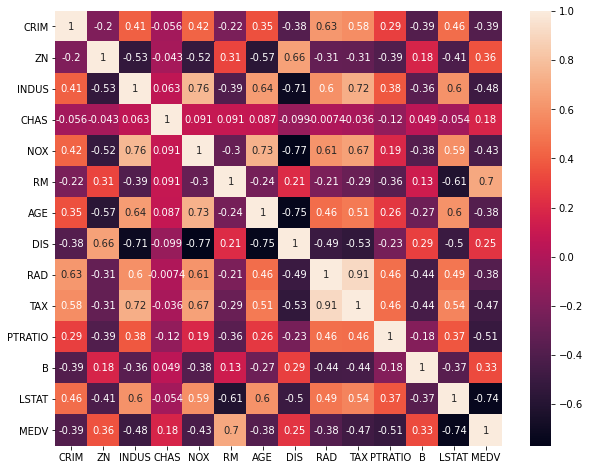

In [147]:
corr = df.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True)
plt.show()

In [148]:
features = corr['MEDV'].abs().sort_values(ascending = False).index.values[1:]

In [149]:
X = df[features].values
Y = df['MEDV'].values

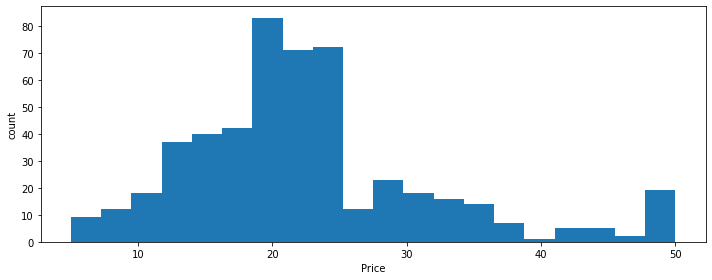

In [150]:
rcParams['figure.figsize'] = 10, 4
plt.hist(Y, bins = 20)
plt.xlabel('Price')
plt.ylabel('count')
plt.tight_layout()

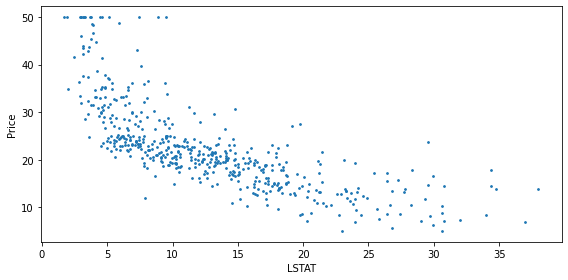

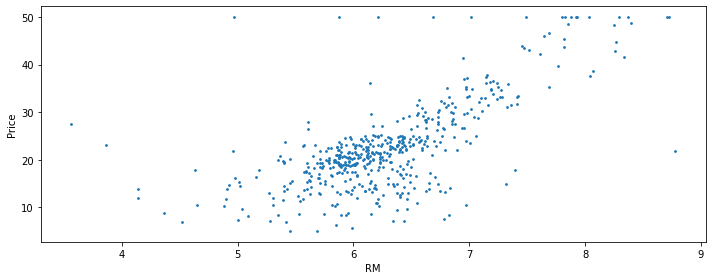

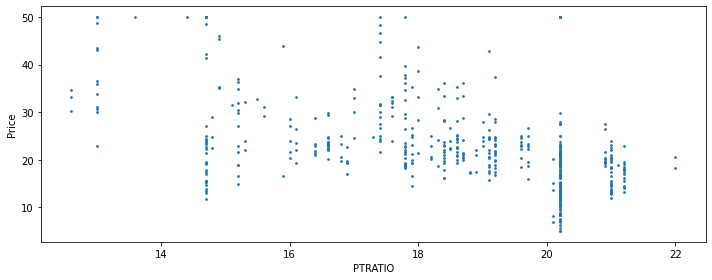

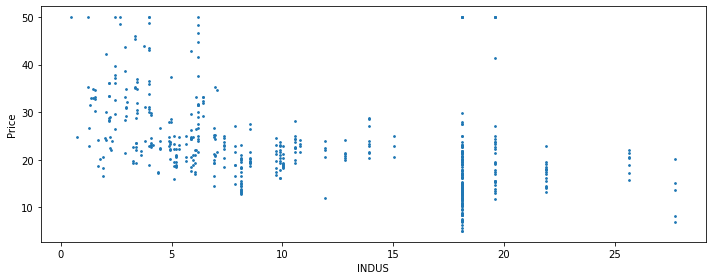

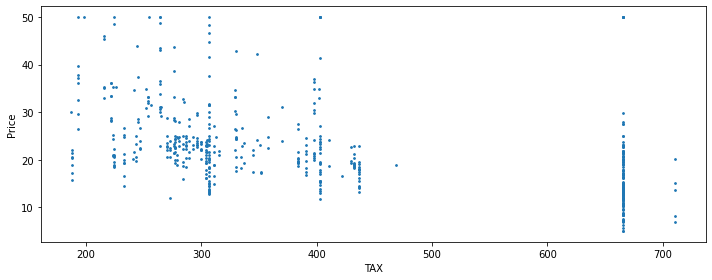

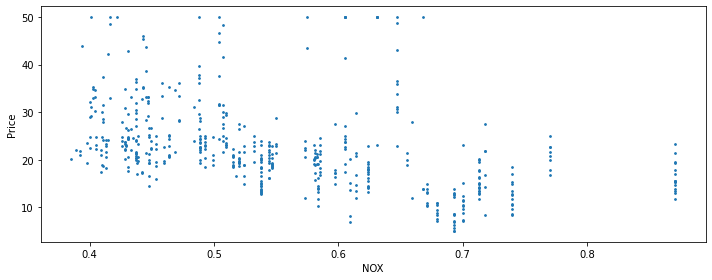

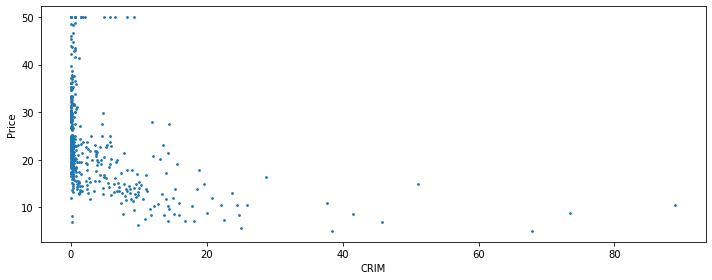

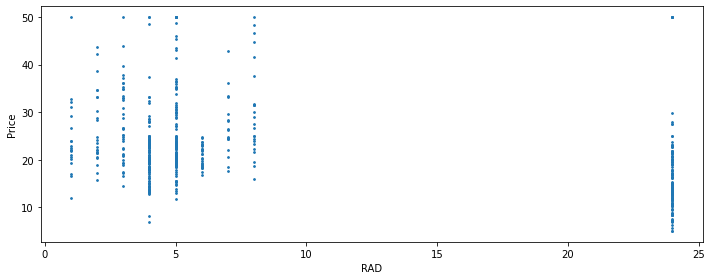

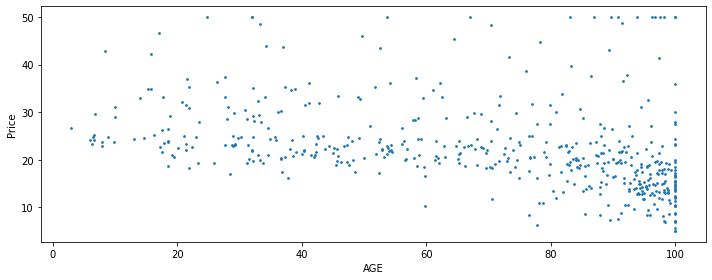

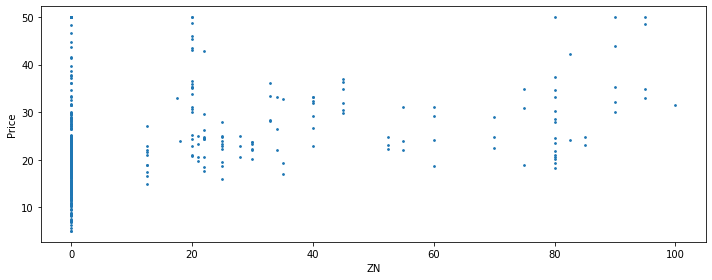

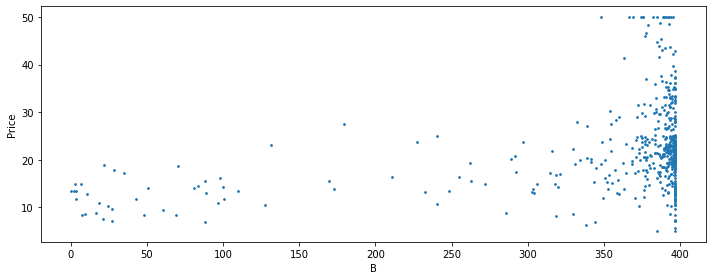

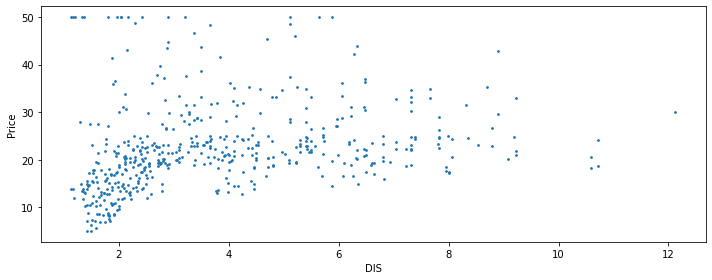

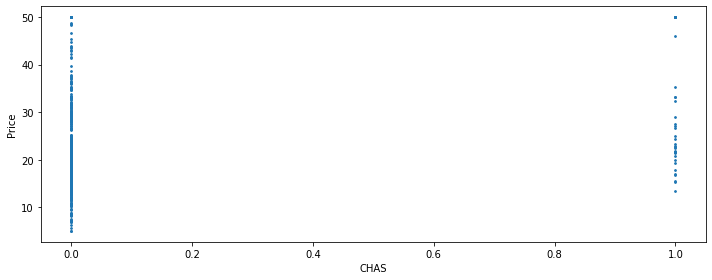

In [151]:
plt.figure(figsize=(8, 4))
for i, f in enumerate(features):
    plt.scatter(X[:, i], Y, s = 3)
    plt.ylabel('Price')
    plt.xlabel(f)
    plt.tight_layout()
    plt.show()

In [152]:
from sklearn.model_selection import train_test_split
x_train, x_test,  y_train, y_test  = train_test_split(X, Y, test_size = 0.2) # 80/20
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2) # 80/20

In [153]:
print(f'Train = {x_train.shape}, {y_train.shape}')
print(f'Valid = {x_valid.shape}, {y_valid.shape}')
print(f'Test  = {x_test.shape}, {y_test.shape}')

Train = (323, 13), (323,)
Valid = (81, 13), (81,)
Test  = (102, 13), (102,)


## First Regression

In [154]:
from sklearn.linear_model import LinearRegression

In [155]:
cols = [ 0 ]
_x_train = x_train[:, cols]
_x_valid = x_valid[:, cols]
_x_test  = x_test[:, cols]

In [156]:
clf = LinearRegression()
clf.fit(_x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [157]:
print(clf.intercept_, clf.coef_)

34.62503894462858 [-0.95343071]


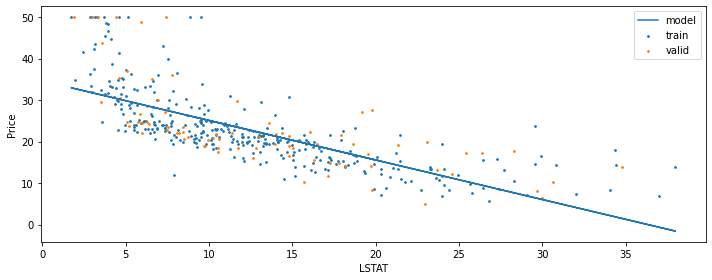

In [158]:
plt.scatter(_x_train, y_train, s = 3, label = 'train')
plt.scatter(_x_valid, y_valid, s = 3, label = 'valid')
plt.plot(_x_train, clf.predict(_x_train), label = 'model')
plt.xlabel(features[0])
plt.ylabel('Price')
plt.legend()
plt.tight_layout()

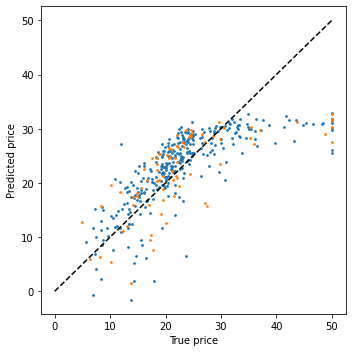

In [159]:
plt.figure(figsize=(5, 5))
plt.scatter(y_train, clf.predict(_x_train), s = 3, label = 'train')
plt.scatter(y_valid, clf.predict(_x_valid), s = 3, label = 'valid')
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()
plt.show()

In [160]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [161]:
print(f'MAE = {mean_absolute_error(clf.predict(_x_train), y_train):3.2f}, {mean_absolute_error(clf.predict(_x_valid), y_valid):.2f}')
print(f'MSE = {mean_squared_error(clf.predict(_x_train), y_train):.2f}, {mean_squared_error(clf.predict(_x_valid), y_valid):.2f}')
print(f'R2 =  {r2_score(clf.predict(_x_train), y_train):.2f}, {r2_score(clf.predict(_x_valid), y_valid):.2f}')

MAE = 4.43, 5.61
MSE = 38.19, 54.66
R2 =  0.17, -0.07


## Multiple Regression

In [162]:
cols = [ 0, 1 ]
_x_train = x_train[:, cols]
_x_valid = x_valid[:, cols]
_x_test  = x_test[:, cols]

In [163]:
clf = LinearRegression()
clf.fit(_x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [164]:
print(clf.intercept_, clf.coef_)

-3.1767430548536595 [-0.63808052  5.36165567]


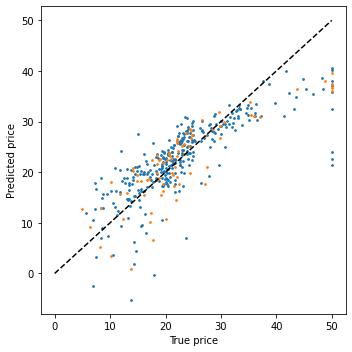

In [165]:
plt.figure(figsize=(5, 5))
plt.scatter(y_train, clf.predict(_x_train), s = 3, label = 'train')
plt.scatter(y_valid, clf.predict(_x_valid), s = 3, label = 'valid')
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()
plt.show()

In [166]:
print(f'MAE = {mean_absolute_error(clf.predict(_x_train), y_train):3.2f}, {mean_absolute_error(clf.predict(_x_valid), y_valid):.2f}')
print(f'MSE = {mean_squared_error(clf.predict(_x_train), y_train):.2f}, {mean_squared_error(clf.predict(_x_valid), y_valid):.2f}')
print(f'R2 =  {r2_score(clf.predict(_x_train), y_train):.2f}, {r2_score(clf.predict(_x_valid), y_valid):.2f}')

MAE = 3.81, 4.31
MSE = 30.56, 30.12
R2 =  0.43, 0.54


## Step Multiple Regression

In [167]:
for i in range(1, len(features) + 1):
    cols = list(range(i))
    print(cols)

[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [168]:
import numpy as np

In [169]:
steps = []
train_stats = []
valid_stats = []

for i in range(1, len(features) + 1):
    cols = list(range(i))
    
    _x_train = x_train[:,cols]
    _x_valid = x_valid[:,cols]

    clf = LinearRegression(fit_intercept=True)
    clf.fit(_x_train, y_train)

    steps.append(i)
    train_stats.append([
        mean_absolute_error(clf.predict(_x_train), y_train),
        mean_squared_error(clf.predict(_x_train), y_train),
        r2_score(clf.predict(_x_train), y_train)
    ])
    valid_stats.append([
        mean_absolute_error(clf.predict(_x_valid), y_valid),
        mean_squared_error(clf.predict(_x_valid), y_valid),
        r2_score(clf.predict(_x_valid), y_valid)
    ])

train_stats = np.array(train_stats)
valid_stats = np.array(valid_stats)

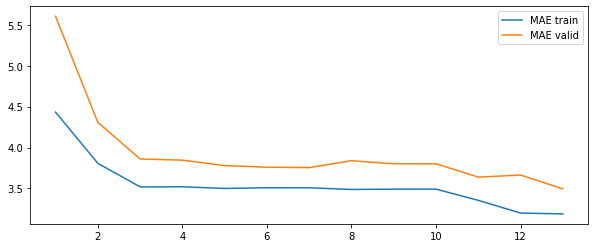

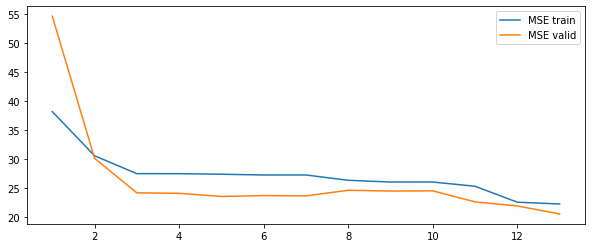

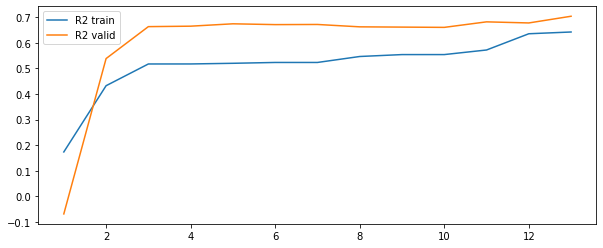

In [170]:
stats_names = ['MAE', 'MSE', 'R2']
for i, n in enumerate(stats_names):
    plt.plot(steps, train_stats[:, i], label = f'{n} train')
    plt.plot(steps, valid_stats[:, i], label = f'{n} valid')
    plt.legend()
    plt.show()

## Feature Engineering for Multiple Regression

In [171]:
from sklearn.preprocessing import PolynomialFeatures

In [172]:
clf = PolynomialFeatures(degree = 2, include_bias = False)
H = clf.fit_transform(X)
H.shape

(506, 104)

In [173]:
features = clf.get_feature_names(features)
features

['LSTAT',
 'RM',
 'PTRATIO',
 'INDUS',
 'TAX',
 'NOX',
 'CRIM',
 'RAD',
 'AGE',
 'ZN',
 'B',
 'DIS',
 'CHAS',
 'LSTAT^2',
 'LSTAT RM',
 'LSTAT PTRATIO',
 'LSTAT INDUS',
 'LSTAT TAX',
 'LSTAT NOX',
 'LSTAT CRIM',
 'LSTAT RAD',
 'LSTAT AGE',
 'LSTAT ZN',
 'LSTAT B',
 'LSTAT DIS',
 'LSTAT CHAS',
 'RM^2',
 'RM PTRATIO',
 'RM INDUS',
 'RM TAX',
 'RM NOX',
 'RM CRIM',
 'RM RAD',
 'RM AGE',
 'RM ZN',
 'RM B',
 'RM DIS',
 'RM CHAS',
 'PTRATIO^2',
 'PTRATIO INDUS',
 'PTRATIO TAX',
 'PTRATIO NOX',
 'PTRATIO CRIM',
 'PTRATIO RAD',
 'PTRATIO AGE',
 'PTRATIO ZN',
 'PTRATIO B',
 'PTRATIO DIS',
 'PTRATIO CHAS',
 'INDUS^2',
 'INDUS TAX',
 'INDUS NOX',
 'INDUS CRIM',
 'INDUS RAD',
 'INDUS AGE',
 'INDUS ZN',
 'INDUS B',
 'INDUS DIS',
 'INDUS CHAS',
 'TAX^2',
 'TAX NOX',
 'TAX CRIM',
 'TAX RAD',
 'TAX AGE',
 'TAX ZN',
 'TAX B',
 'TAX DIS',
 'TAX CHAS',
 'NOX^2',
 'NOX CRIM',
 'NOX RAD',
 'NOX AGE',
 'NOX ZN',
 'NOX B',
 'NOX DIS',
 'NOX CHAS',
 'CRIM^2',
 'CRIM RAD',
 'CRIM AGE',
 'CRIM ZN',
 'CRIM B',
 

In [174]:
x_train, x_test,  y_train, y_test  = train_test_split(H, Y, test_size = 0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2)

In [175]:
print(f'Train = {x_train.shape}, {y_train.shape}')
print(f'Valid = {x_valid.shape}, {y_valid.shape}')
print(f'Test  = {x_test.shape}, {y_test.shape}')

Train = (323, 104), (323,)
Valid = (81, 104), (81,)
Test  = (102, 104), (102,)


In [176]:
steps = []
train_stats = []
valid_stats = []
models = []

for i in range(1, len(features) + 1):
    cols = list(range(i))
    
    _x_train = x_train[:,cols]
    _x_valid = x_valid[:,cols]

    clf = LinearRegression(fit_intercept=True)
    clf.fit(_x_train, y_train)

    steps.append(i)
    models.append(clf)
    train_stats.append([
        mean_absolute_error(clf.predict(_x_train), y_train),
        mean_squared_error(clf.predict(_x_train), y_train),
        r2_score(clf.predict(_x_train), y_train)
    ])
    valid_stats.append([
        mean_absolute_error(clf.predict(_x_valid), y_valid),
        mean_squared_error(clf.predict(_x_valid), y_valid),
        r2_score(clf.predict(_x_valid), y_valid)
    ])

train_stats = np.array(train_stats)
valid_stats = np.array(valid_stats)

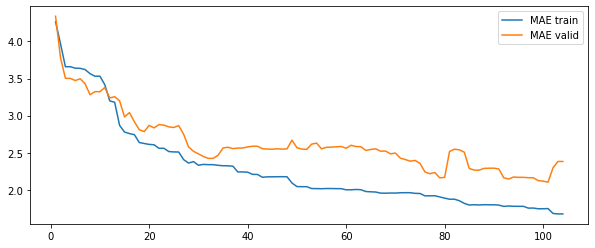

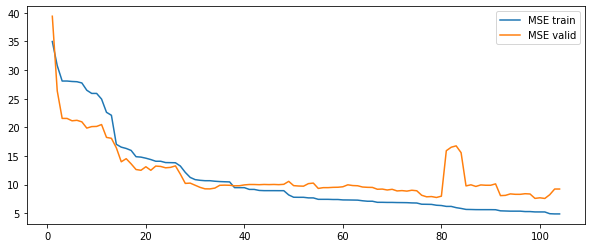

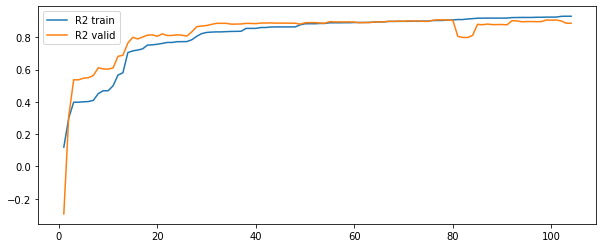

In [177]:
stats_names = ['MAE', 'MSE', 'R2']
for i, n in enumerate(stats_names):
    plt.plot(steps, train_stats[:, i], label = f'{n} train')
    plt.plot(steps, valid_stats[:, i], label = f'{n} valid')
    #plt.yscale('log')
    plt.legend()
    plt.show()

In [178]:
best_index = np.argmin(valid_stats[:,1])
best_index

100

In [179]:
clf = models[best_index]
cols = list(range(best_index + 1))
_x_train = x_train[:,cols]
_x_valid = x_valid[:,cols]
_x_test  = x_test[:,cols]

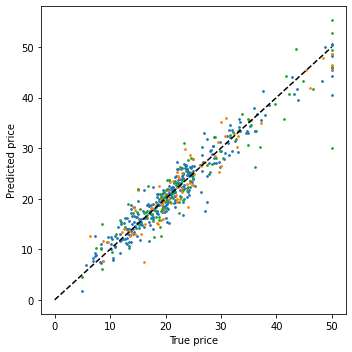

In [180]:
plt.figure(figsize=(5, 5))
plt.scatter(y_train, clf.predict(_x_train), s = 3, label = 'train')
plt.scatter(y_valid, clf.predict(_x_valid), s = 3, label = 'valid')
plt.scatter(y_test, clf.predict(_x_test), s = 3, label = 'test')
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()
plt.show()

In [181]:
print('MAE')
print(f'train = {mean_absolute_error(clf.predict(_x_train), y_train):3.2f}')
print(f'valid = {mean_absolute_error(clf.predict(_x_valid), y_valid):.2f}')
print(f'test  = {mean_absolute_error(clf.predict(_x_test), y_test):.2f}')

MAE
train = 1.75
valid = 2.10
test  = 2.52


In [182]:
print('MSE')
print(f'train = {mean_squared_error(clf.predict(_x_train), y_train):3.2f}')
print(f'valid = {mean_squared_error(clf.predict(_x_valid), y_valid):.2f}')
print(f'test  = {mean_squared_error(clf.predict(_x_test), y_test):.2f}')

MSE
train = 5.21
valid = 7.57
test  = 13.25


In [183]:
print('R2')
print(f'train = {r2_score(clf.predict(_x_train), y_train):3.2f}')
print(f'valid = {r2_score(clf.predict(_x_valid), y_valid):.2f}')
print(f'test  = {r2_score(clf.predict(_x_test), y_test):.2f}')

R2
train = 0.93
valid = 0.91
test  = 0.87


## KFold Multiple Regression

In [184]:
x_train, x_test,  y_train, y_test = train_test_split(H, Y, test_size = 0.2)

In [185]:
print(f'Train = {x_train.shape}, {y_train.shape}')
print(f'Test  = {x_test.shape}, {y_test.shape}')

Train = (404, 104), (404,)
Test  = (102, 104), (102,)


In [186]:
from sklearn.model_selection import KFold

In [187]:
kfold = KFold(n_splits = 10)
for train_index, valid_index in kfold.split(x_train):
    print(valid_index)
    print(train_index)
    break

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
[ 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 25

In [188]:
steps = []
train_stats = []
valid_stats = []
models = []

kfold = KFold(n_splits = 10)
for i in range(1, len(features) + 1):
    cols = list(range(i))

    y_valid = np.copy(y_train)
    train_metrics = np.zeros((3,))
    for train_index, valid_index in kfold.split(x_train):
        
        _x_train = x_train[train_index,:][:,cols]
        _x_valid = x_train[valid_index,:][:,cols]
        _y_train = y_train[train_index]

        clf = LinearRegression(fit_intercept = True)
        clf.fit(_x_train, _y_train)
        train_metrics += [
            mean_absolute_error(clf.predict(_x_train), _y_train),
            mean_squared_error(clf.predict(_x_train), _y_train),
            r2_score(clf.predict(_x_train), _y_train)
        ]        
        y_valid[valid_index] = clf.predict(_x_valid)

    steps.append(i)
    models.append(clf)
    train_stats.append(
        train_metrics / kfold.n_splits
    )
    valid_stats.append([
        mean_absolute_error(y_valid, y_train),
        mean_squared_error(y_valid, y_train),
        r2_score(y_valid, y_train)
    ])

train_stats = np.array(train_stats)
valid_stats = np.array(valid_stats)

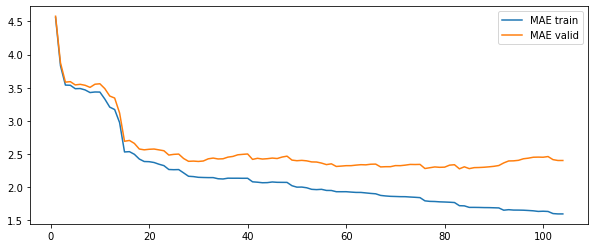

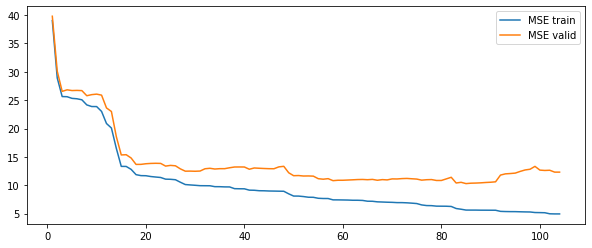

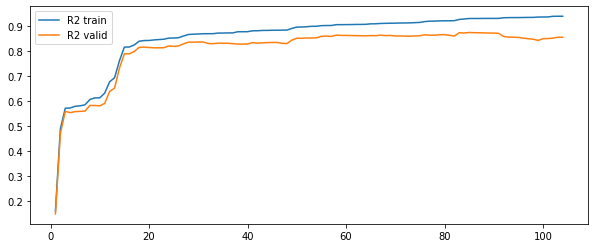

In [189]:
stats_names = ['MAE', 'MSE', 'R2']
for i, n in enumerate(stats_names):
    plt.plot(steps, train_stats[:, i], label = f'{n} train')
    plt.plot(steps, valid_stats[:, i], label = f'{n} valid')
    plt.legend()
    plt.show()

In [190]:
best_index = np.argmin(valid_stats[:,1])
best_index

84

In [191]:
clf = models[best_index]
cols = list(range(best_index + 1))
_x_train = x_train[:,cols]
_x_test  = x_test[:,cols]

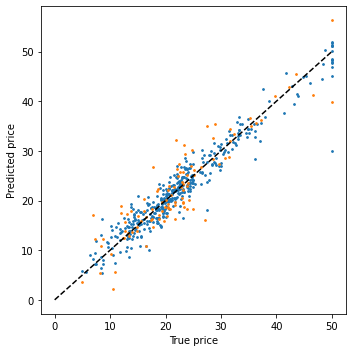

In [192]:
plt.figure(figsize=(5, 5))
plt.scatter(y_train, clf.predict(_x_train), s = 3, label = 'train')
plt.scatter(y_test, clf.predict(_x_test), s = 3, label = 'test')
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()
plt.show()

In [193]:
print('MAE')
print(f'train = {mean_absolute_error(clf.predict(_x_train), y_train):3.2f}')
print(f'test  = {mean_absolute_error(clf.predict(_x_test), y_test):.2f}')

MAE
train = 1.77
test  = 2.91


In [194]:
print('MSE')
print(f'train = {mean_squared_error(clf.predict(_x_train), y_train):3.2f}')
print(f'test  = {mean_squared_error(clf.predict(_x_test), y_test):.2f}')

MSE
train = 5.97
test  = 15.30


In [195]:
print('R2')
print(f'train = {r2_score(clf.predict(_x_train), y_train):3.2f}')
print(f'test  = {r2_score(clf.predict(_x_test), y_test):.2f}')

R2
train = 0.93
test  = 0.82


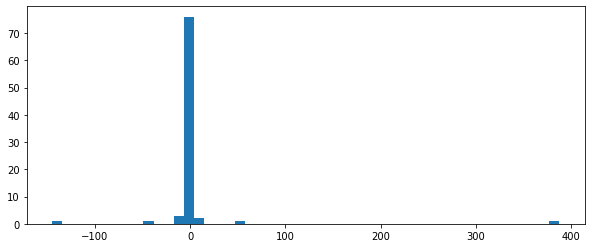

In [196]:
ws = clf.coef_
plt.hist(ws, bins=50)
plt.show()

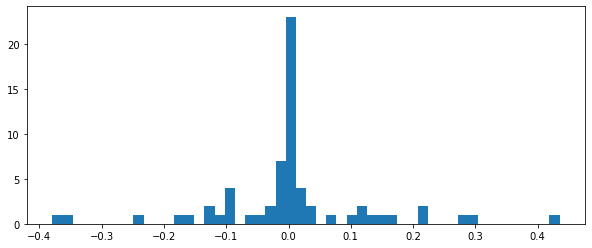

In [197]:
ws_mask = (ws > -0.5) & (ws < 0.5)
plt.hist(ws[ws_mask], bins=50)
plt.show()

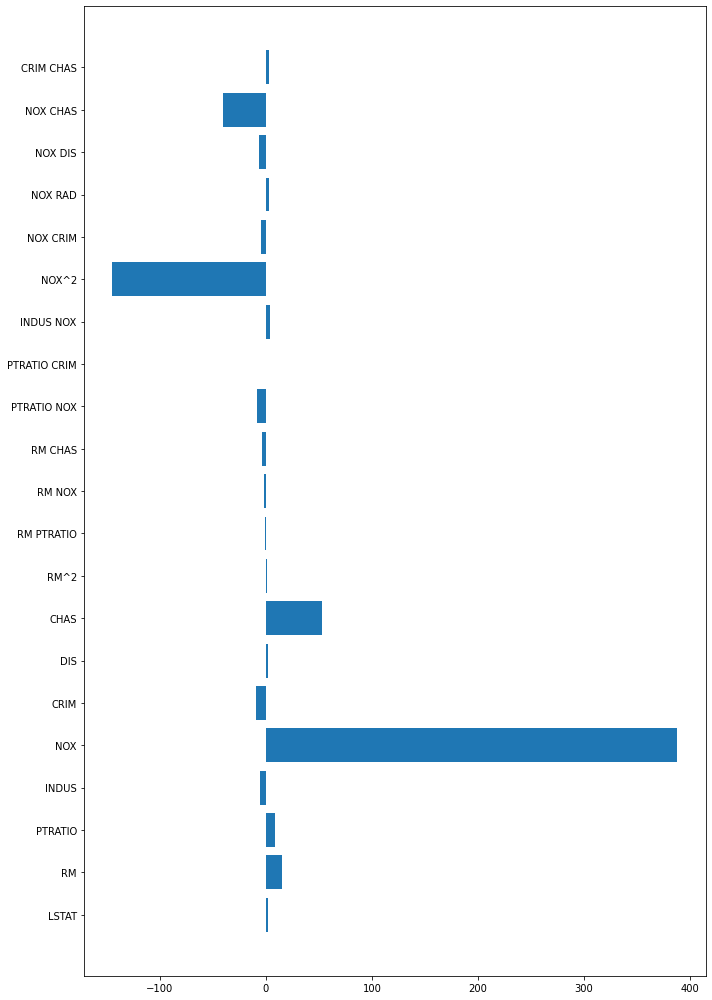

In [198]:
plt.figure(figsize=(10, 14))
plt.barh(np.array(features)[cols][np.invert(ws_mask)], ws[np.invert(ws_mask)])
plt.tight_layout()
plt.show()

## Išvados

1. Modelis paaiškina 82% kainų variacijos;
2. Modelyje svarbiausi yra NOX ir NOX2 požymiai;
3. Geriausias rezultatas pasiektas naudojant KFold validacijos metodą.